In [1]:
import numpy as np
import matplotlib.pyplot as plt

Physical constants:

In [2]:
#EAU = 27.2114
IAU = 3.5e16
#LAU = 0.052918
TAU = 2.419e-17
#alpha = 1. /137
c = 2.998e8  # Speed of light in m/s
LAU = 5.29177e-11  # Bohr radius in meters
#c = 1/alpha

Define fixed Paramaters:

In [3]:
wavelength = 800e-9 #Wavelength in nm
Int_0 = 4e14 #Intensity in W/cm2
#Ip = 0.5 * 13.5984 # Hydrogen gas target ionization potential in eV

omega = 2 * np.pi * LAU * c / wavelength  # Angular frequency
TC = 2 * np.pi / omega  # Optical cycle period

In [4]:
print(omega)

124601.27024486901


Field configurations:

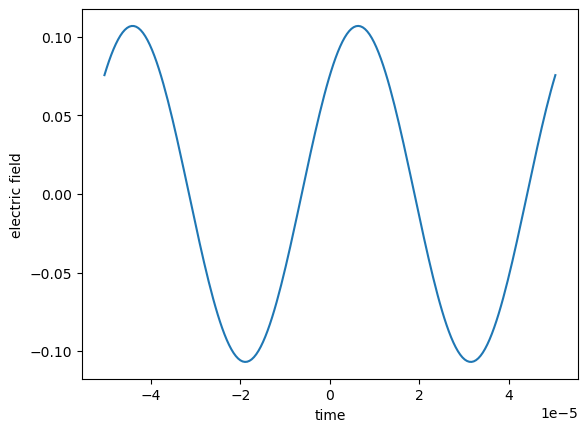

In [9]:
t_list = np.linspace(-TC, TC, 200)  #time list

#define a function for a two-colour field, with mixing angle theta and phase shift phi
def beam(theta, phi, r, s):
    Int_1 = Int_0 * (np.cos(theta))**2  #Intensity of beam 1
    Int_2 = Int_0 * (np.sin(theta))**2  #Intensity of beam 1
    omega_1 = r * omega  #Frequency of beam 1
    omega_2 = s * omega  #Frequency of beam 1

    E_01 = np.sqrt(Int_1 / IAU)  #field strength of beam 1
    E_02 = np.sqrt(Int_2 / IAU)  #field strength of beam 2

    e_field = []  #create empty lists to store electric field values for each point in time

    for i in t_list:
        beam_1 = E_01 * np.sin(omega_1 * i)
        beam_2 = E_02 * np.sin((omega_2 * i) + phi)
        total_beam = beam_1 + beam_2

        e_field.append(total_beam)

    #return e_field
    plt.plot(t_list, e_field, label='two-colour field')
    plt.xlabel("time")
    plt.ylabel("electric field")
    plt.show()

beam(np.pi / 4, np.pi /2, 1, 1)